# Prepare Exercises

------

------

In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('store_item_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item           913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   sale_date      913000 non-null  object 
 4   sale_id        913000 non-null  int64  
 5   store          913000 non-null  int64  
 6   store_address  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_id       913000 non-null  int64  
 9   store_state    913000 non-null  object 
 10  store_zipcode  913000 non-null  int64  
 11  item_brand     913000 non-null  object 
 12  item_id        913000 non-null  int64  
 13  item_name      913000 non-null  object 
 14  item_price     913000 non-null  float64
 15  item_upc12     913000 non-null  int64  
 16  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(9), obje

In [61]:
df.drop(columns = ['store', 'item'], inplace = True)

In [62]:
df.isna().sum()

Unnamed: 0       0
sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [63]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
sale_amount,13,11,14,13,10
sale_date,"Tue, 01 Jan 2013 00:00:00 GMT","Wed, 02 Jan 2013 00:00:00 GMT","Thu, 03 Jan 2013 00:00:00 GMT","Fri, 04 Jan 2013 00:00:00 GMT","Sat, 05 Jan 2013 00:00:00 GMT"
sale_id,1,2,3,4,5
store_address,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy
store_city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
store_id,1,1,1,1,1
store_state,TX,TX,TX,TX,TX
store_zipcode,78253,78253,78253,78253,78253
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland


### 1.)Convert date column to datetime format.


In [75]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Unnamed: 0     913000 non-null  int64              
 1   item           913000 non-null  int64              
 2   sale_amount    913000 non-null  float64            
 3   sale_date      913000 non-null  datetime64[ns, UTC]
 4   sale_id        913000 non-null  int64              
 5   store          913000 non-null  int64              
 6   store_address  913000 non-null  object             
 7   store_city     913000 non-null  object             
 8   store_id       913000 non-null  int64              
 9   store_state    913000 non-null  object             
 10  store_zipcode  913000 non-null  int64              
 11  item_brand     913000 non-null  object             
 12  item_id        913000 non-null  int64              
 13  item_name      913000 non-nul

In [76]:
df.head(3)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [77]:
df.sale_amount = df.sale_amount.astype('int')

### 2.) Plot the distribution of sale_amount and item_price.


In [78]:
## looking at standard df not test, train, or validate datasets####
def standard_distribution_visual(df):
    '''
    General look at the distribution of each column,
    univariate exploration so doesnt need train dataset
    '''
    df.hist()
    plt.tight_layout()
    plt.show()

In [68]:
df.describe()

,Unnamed: 0,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05
mean,456499.500000,52.250287,456500.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11
std,263560.542224,28.801144,263560.542224,2.872283,16.479087,14.430878,2.737764,2.978005e+11,2.978005e+11
min,0.000000,0.000000,1.000000,1.000000,78201.000000,1.000000,0.600000,8.500005e+09,8.500005e+09
25%,228249.750000,30.000000,228250.750000,3.000000,78217.000000,13.000000,2.970000,3.367410e+10,3.367410e+10
50%,456499.500000,47.000000,456500.500000,5.500000,78220.500000,25.500000,5.195000,7.103651e+10,7.103651e+10
75%,684749.250000,70.000000,684750.250000,8.000000,78232.000000,38.000000,7.520000,6.030842e+11,6.030842e+11
max,912999.000000,231.000000,913000.000000,10.000000,78253.000000,50.000000,9.640000,8.846237e+11,8.846237e+11


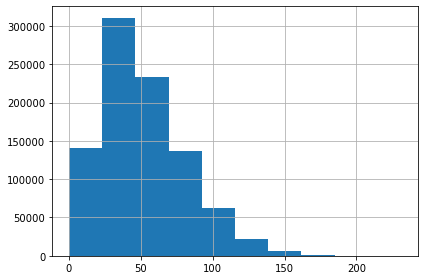

In [33]:
standard_distribution_visual(df.sale_amount)

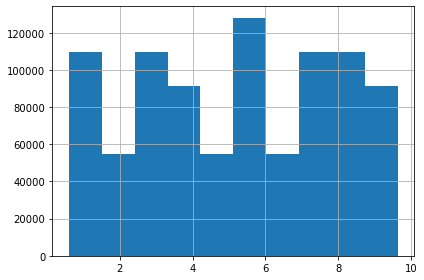

In [34]:
standard_distribution_visual(df.item_price)

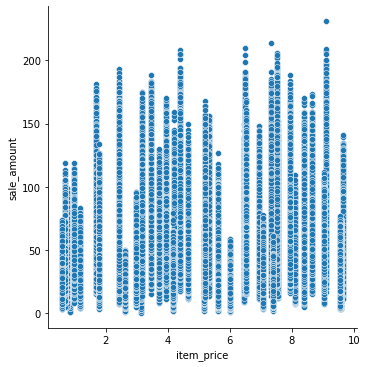

In [35]:
##simple scatter plot of two continuous variables.
sns.relplot(df.item_price, df.sale_amount)

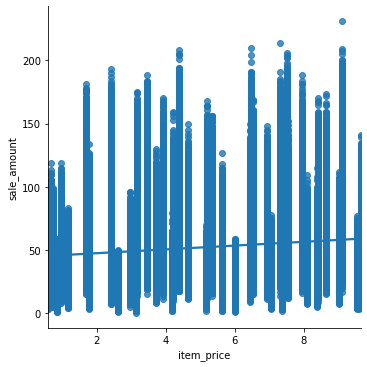

In [36]:
#sns.lmplot(x = 'item_price', y = 'sale_amount', data = df)
    #for a simple scatter plot of two continuous variables with a regression line and the addition of a histogram for each variable.

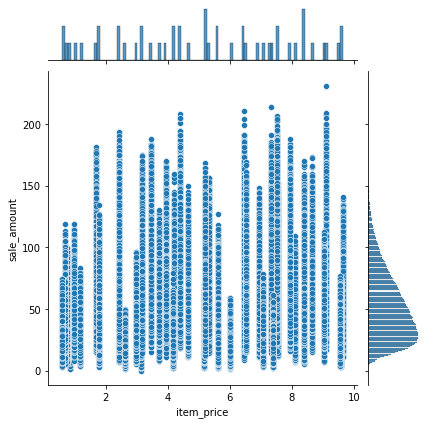

In [37]:
#sns.jointplot(df.item_price, df.sale_amount, kind='scatter')

### 3.) Set the index to be the datetime variable.


In [79]:
df = df.set_index('sale_date').sort_index()

In [80]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,211816,12,26,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,832656,46,27,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,213642,12,54,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,215468,12,35,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4.) Add a 'month' and 'day of week' column to your dataframe.


In [81]:
df['month'] = df.index.month

In [82]:
df['day_of_week'] = df.index.day_name()

In [83]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,211816,12,26,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,832656,46,27,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,213642,12,54,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,215468,12,35,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5.) Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [84]:
df['sales_total'] = (df.sale_amount * df.item_price)

In [85]:
df.head(5)

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,12,26,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,46,27,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,12,54,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,12,35,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


### 6.) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [149]:
def prepare_store_items_sale(df):
    #for this dataset dropping repetitive columns
    df.drop(columns = ['store', 'item'], inplace = True)
    #changin sale_amount to int.
    df.sale_amount = df.sale_amount.astype('int')
    # converting sale date to datetime
    df.sale_date = pd.to_datetime(df.sale_date)
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = (df.sale_amount * df.item_price)
    
    return df

--------

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [4]:
gp_df = pd.read_csv('germany_power.csv')
gp_df 

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.18400,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714


### 1.) Convert date column to datetime format.

In [5]:
gp_df.Date= pd.to_datetime(gp_df.Date)
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


In [6]:
gp_df.head(3)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN


In [7]:
gp_df.columns

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

### 2.) Plot the distribution of each of your variables.


In [8]:
cols= list(gp_df.columns)

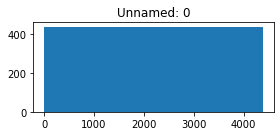

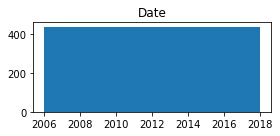

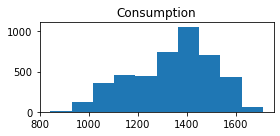

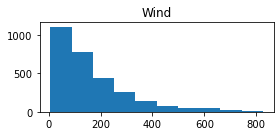

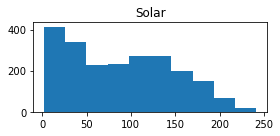

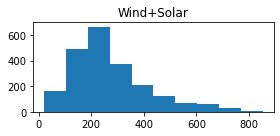

In [9]:
for col in gp_df[cols]:
    plt.figure(figsize=(4,2))
    plt.hist(gp_df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

### 3.) Set the index to be the datetime variable.


In [10]:
gp_df = gp_df.set_index('Date').sort_index()

### 4.) Add a month and a year column to your dataframe.


In [11]:
gp_df['month'] = gp_df.index.month
gp_df['year'] = gp_df.index.year

### 5.) Fill any missing values.


In [99]:
gp_df.fillna(0, inplace = True)

In [100]:
gp_df.head(10)

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,0,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,2,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,3,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,4,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,4379,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,4380,1295.08753,584.277,29.854,614.131,12,2017


In [ ]:
# so brainstorming for Nan(0 values) look into monthly average. 

In [143]:
gp_df[gp_df['Wind'] < gp_df['Solar']] # when wind is less than solar no nulls

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2012-01-15,2205,1150.92000,34.468,36.609,71.077,1,2012
2012-02-03,2224,1563.63100,36.352,46.510,82.862,2,2012
2012-02-04,2225,1372.61400,20.551,45.225,65.776,2,2012
2012-02-06,2227,1574.76600,34.896,55.389,90.285,2,2012
2012-02-11,2232,1377.40400,32.375,44.629,77.004,2,2012
...,...,...,...,...,...,...,...
2017-09-21,4281,1421.64603,45.210,123.775,168.985,9,2017
2017-09-22,4282,1401.40633,16.478,113.891,130.369,9,2017
2017-09-23,4283,1191.10345,28.878,117.186,146.064,9,2017


In [142]:
gp_df[(gp_df['Wind'] < 1) & (gp_df['Solar'] <1)]

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,0,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,2,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,3,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,4,1477.131,0.0,0.0,0.0,1,2006
...,...,...,...,...,...,...,...
2009-12-28,1457,1211.791,0.0,0.0,0.0,12,2009
2009-12-29,1458,1207.905,0.0,0.0,0.0,12,2009
2009-12-30,1459,1192.196,0.0,0.0,0.0,12,2009


### 6.) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [150]:
def prepare_german(df):
    df.Date= pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    df['month'] = df.index.month
    df['year'] = df.index.year
    df.fillna(0, inplace = True)
    return df